In [2]:
using Catlab, Catlab.CategoricalAlgebra, Catlab.Programs, Catlab.WiringDiagrams, Catlab.Graphics 
using AlgebraicPetri 
using AlgebraicDynamics.UWDDynam 

using DifferentialEquations 

using LabelledArrays 
using Plots

In [3]:
# My model
SIR = Open(LabelledPetriNet(
    [:Sv, :Sn, :Iv, :In, :Rv, :Rn],             # Defining places
    # Defining Transitions
    :alpha => ((:Sn) => (:In)),
    :beta => ((:Sv, :In) => (:Iv, :In)),
    :gamma_max => ((:Iv) => (:Rv)),
    :gamma_min => ((:In) => (:Rn)),
    :tau => ((:Rv, :Rn) => (:Sv, :Sn))
))

StructuredMulticospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{AnonACSet{TypeLevelBasicSchema{Symbol, Tuple{:S}, Tuple{}, Tuple{:Name}, Tuple{(:sname, :S, :Name)}, Tuple{}}, Tuple{Symbol}, @NamedTuple{S::IntParts, Name::IntParts}, @NamedTuple{sname::ACSets.ColumnImplementations.DenseColumn{Union{AttrVar, Symbol}, Vector{Union{AttrVar, Symbol}}}}, IntParts}, LabelledPetriNet}, SMulticospan{6, LabelledPetriNet, StructTightACSetTransformation{TypeLevelBasicSchema{Symbol, Tuple{:T, :S, :I, :O}, Tuple{(:it, :I, :T), (:is, :I, :S), (:ot, :O, :T), (:os, :O, :S)}, Tuple{:Name}, Tuple{(:tname, :T, :Name), (:sname, :S, :Name)}, Tuple{}}, @NamedTuple{T::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, S::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, I::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Cat

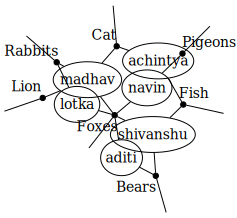

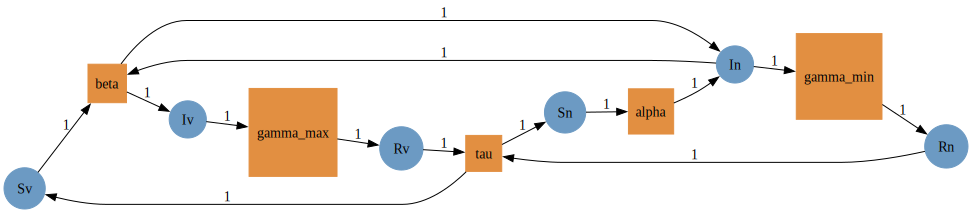

In [4]:
to_graphviz(SIR, program="neato")

In [15]:
vigilant_infect = ContinuousResourceSharer{Float64}(1, 1, (u, p, t) -> p.beta * u[4] / p.N , [3])
negligent_infect = ContinuousResourceSharer{Float64}(1, 1, (u, p, t) -> p.alpha * u[4], [4])
vigilant_recover = ContinuousResourceSharer{Float64}(2, 2, (u, p, t) -> [p.gamma_min * u[1] * u[2], -p.beta * u[1] * u[2]], [1, 2])
negligent_recover = ContinuousResourceSharer{Float64}(2, 2, (u, p, t) -> [0, -p.beta * u[1] * u[2]], [1, 2])
immune_lose = ContinuousResourceSharer{Float64}(2, 2, (u, p, t) -> [p.gamma_max * u[1] * u[2], -p.beta * u[1] * u[2]], [1, 2])

ContinuousResourceSharer(ℝ^2 → ℝ^2) with 2 exposed ports

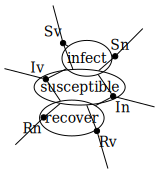

In [16]:

SIR_composition_pattern = @relation (Sv, Sn, Iv, In, Rv, Rn) where (Sv, Sn, Iv, In, Rv, Rn) begin   
    susceptible(Sv, Sn, Rv, Rn)
    infect(In, Iv, Sv, Sn)
    recover(In, Iv, Rv, Rn)
end  

to_graphviz(SIR_composition_pattern,  box_labels = :name, junction_labels = :variable)

In [20]:
p = LVector(alpha=0.45, beta=0.3, gamma_max=0.4, gamma_min=0.2, N=17)
u0 = LVector(Sv=10, Sn=5, Iv=1, In=1, Rv=0, Rn=0)
soln = solve(ODEProblem(vectorfield(apex(SIR_composition_pattern)), u0, (0.0, 100.0), p))
plot(soln)

LoadError: MethodError: no method matching apex(::Catlab.Programs.RelationalPrograms.UntypedUnnamedRelationDiagram{Symbol, Symbol})

[0mClosest candidates are:
[0m  apex([91m::StructuredMulticospan[39m)
[0m[90m   @[39m [35mCatlab[39m [90mC:\Users\LENOVO\.julia\packages\Catlab\5M12F\src\categorical_algebra\[39m[90m[4mStructuredCospans.jl:52[24m[39m
[0m  apex([91m::AbstractColimit[39m)
[0m[90m   @[39m [35mCatlab[39m [90mC:\Users\LENOVO\.julia\packages\Catlab\5M12F\src\categorical_algebra\[39m[90m[4mLimits.jl:89[24m[39m
[0m  apex([91m::AbstractLimit[39m)
[0m[90m   @[39m [35mCatlab[39m [90mC:\Users\LENOVO\.julia\packages\Catlab\5M12F\src\categorical_algebra\[39m[90m[4mLimits.jl:46[24m[39m
[0m  ...
